In [1]:
!pip install gymnasium keras

In [1]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.layers import GaussianNoise
import pandas as pd

random.seed(0)

class DQNAgent():
    def __init__(self, env, epsilon=1.0, alpha=0.5, gamma=0.9, time = 30000):
        self.env = env
        self.action_size = self.env.action_space.n
        self.state_size = env.observation_space
        self.memory = deque(maxlen=2000) # Record past experiences- [(state, action, reward, next_state, done)...]
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor
        self.gamma = gamma       # Discount factor- closer to 1 learns well into distant future
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning = True
        self.model = self._build_model()
        
        self.time = time 
        self.time_left = time # Epsilon Decay
        self.small_decrement = (0.4 * epsilon) / (0.3 * self.time_left) # reduce epsilon
        print('HELLO')
    
    # Build Neural Net
    def _build_model(self):
#         print(type(self.state_size))
        model = Sequential()
        model.add(Dense(32, input_shape = (2,), kernel_initializer='random_uniform', activation='relu'))
        model.add(GaussianNoise(0.1))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(self.action_size, activation='softmax'))
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=self.alpha))
        
        return model
       
#     # Remember function that stores states, actions, rewards, and done to memory
#     def remember(self, state, action, reward, next_state, done):
#         self.memory.append([state, action, reward, next_state, done])

    def choose_action(self, state):
        """
        Choose which action to take, based on the observation. 
        Uses greedy epsilon for exploration/exploitation.
        """

        # if random number > epsilon, act 'rationally'. otherwise, choose random action
        
        if np.random.rand() <= self.epsilon:
            action = random.randrange(self.action_size)
            
        else:
            action_value = self.model.predict(state)
            action = np.argmax(action_value[0])
        
        self.update_parameters()
        return action
    
    def boltzmann_action(self, state):
        
        current_action_values = np.zeros(self.env.action_space.n) 
    
        for key,value in self.model.predict(state):
            current_action_values[key] = value
        exp_probabilities = np.exp(current_action_values / self.temperature )
#         print( 'exp', exp_probabilities)
        probabilities = exp_probabilities / np.sum(exp_probabilities)
        
#         print( 'normoalization' , probabilities)
        probabilities[-1] = 1 - np.sum(probabilities[:-1])
        
#         if 1- np.sum(np.sum(probabilities[:-1])) < 1e-10 :
#             probabilities[-1] = 1e-10
            
        
#         print(probabilities)
        # choose actions according to the probabilities
        action = np.random.choice(range(self.env.action_space.n), p=probabilities)
        return action 
        
        
    def update_parameters(self):
        """
        Update epsilon and alpha after each action
        Set them to 0 if not learning
        """
#         print(self.time_left)
        if self.time_left > 0.9 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.7 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.5 * self.time:
            self.epsilon -= self.small_decrement
#             print('0.5')
        elif self.time_left > 0.3 * self.time:
#             print('0.2')
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.1 * self.time:
            self.epsilon -= self.small_decrement
#         elif self.time_left < 0.05 * self.time:
#             self.epsilon = 0.000
#             self.learning = False

#         print(self.time_left)
        #         print(self.time)
        self.time_left -= 1       


    def learn(self, state, action, reward, next_state, done):
        
        
        
#         minibatch = random.sample(self.memory, batch_size)
#         print(minibatch)
        
        target = reward
#         print('STATE: ' + str(state))
#             print('next_state: ' + str(state))

#         print('target: ' + str(target))

        if not done:
            target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

#         print('target: ' + str(target))


#         print('action: ' + str(action))
#             print(self.model.predict(next_state))
#         print(np.amax(self.model.predict(next_state)[0]))

        target_f = self.model.predict(state)
#         print(target_f)
#         print('target_f: ' + str(target_f))


        target_f[0][action] = target
#         print('target_f: ' + str(target_f))
#             print('target_f: ' + str(target_f))
#         print('-------')

        self.model.fit(state, target_f, epochs=1, verbose=0)
        
        
#             print(self.time)
#         print(self.epsilon)

    def get_optimal_strategy(self):
        index = []
        for x in range(0,21):
            for y in range(1,11):
                index.append((x,y))

        df = pd.DataFrame(index = index, columns = ['Stand', 'Hit'])

        for ind in range(0,21):
            outcome = self.model.predict([np.array([index[ind]])], batch_size=1)
            df.loc[ind, 'Stand'] = outcome[0][0]
            df.loc[ind, 'Hit'] = outcome[0][1]


        df['Optimal'] = df.apply(lambda x : 'Hit' if x['Hit'] >= x['Stand'] else 'Stand', axis=1)
        df.to_csv('optimal_policy.csv')
        return df

HELLO
1/1 [==============================] - ETA: 0s

C:\Users\87235\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
Done with sample: 0   --- 12.761773347854614 seconds ---
0.09816888888888833
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 10   --- 180.10798692703247 seconds ---
0.07516444444443685
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 20   --- 360.29370307922363 seconds ---
0.05089777777776728
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
Done with sample: 30   --- 538.2782607078552 seconds ---
0.027573333333324797
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 40   --- 716.0892317295074 seconds ---
0.0036977777777700907
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
           Stand       Hit Optimal
(0, 1)       NaN       NaN   Stand
(0, 2)       NaN       NaN   Stand
(0, 3)       NaN       NaN   Stand
(0, 4)       NaN       NaN   Stand
(0, 5)       NaN       NaN   Stand
...          ...       ...     ...
16      0.481236  0.518764     Hit
17      0.479173  0.520827     Hit
18       0.47711   0.52289     Hit
19      0.475049  0.524951     Hit
20      0.486612  0.513388     Hit

[231 rows x 3 columns]


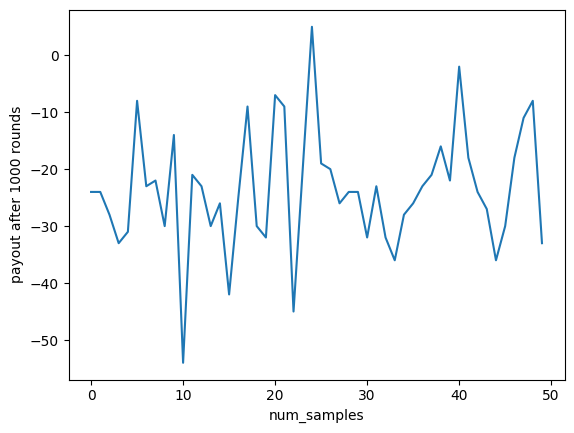

Average payout after 100 rounds is -23.68


In [2]:
from blackjackenv import BlackjackEnv
env = BlackjackEnv()
env.reset()
# env = wrappers.Monitor(env, './logs/blackjack-Q', False, True)
import matplotlib.pyplot as plt
from collections import deque
import time

start_time = time.time()

# print(agent.model)

num_rounds = 100 # Payout calculated over num_rounds
num_samples = 50 # num_rounds simulated over num_samples

agent = DQNAgent(env=env, epsilon=0.1, alpha=0.001, gamma=0.001, time=7500)

average_payouts = []

state,_ = env.reset()
state = np.reshape(state[0:2], [1,2])
for sample in range(num_samples):
    round = 1
    total_payout = 0 # store total payout per sample
    while round <= num_rounds:
        action = agent.choose_action(state)
        next_state, payout, done, _, _ = env.step(action)
        next_state = np.reshape(next_state[0:2], [1,2])

        
        total_payout += payout    
#         if agent.learning:
        agent.learn(state, action, payout, next_state, done)
        
        state = next_state
        state = np.reshape(state[0:2], [1,2])
        
        if done:
            state,_ = env.reset() # Environment deals new cards to player and dealer
            state = np.reshape(state[0:2], [1,2])
            round += 1

    average_payouts.append(total_payout)

    if sample % 10 == 0:
        print('Done with sample: ' + str(sample) + str("   --- %s seconds ---" % (time.time() - start_time)))
        print(agent.epsilon)

print(agent.get_optimal_strategy())

# Plot payout per 1000 episodes for each value of 'sample'

plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))


In [3]:

import random
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.layers import GaussianNoise
import pandas as pd

random.seed(0)

class DQNAgent():
    def __init__(self, env, epsilon=1.0, alpha=0.5, gamma=0.9, time = 30000, noise_scale=0.1):
        self.env = env
        self.action_size = self.env.action_space.n
        self.state_size = env.observation_space
        self.memory = deque(maxlen=2000) # Record past experiences- [(state, action, reward, next_state, done)...]
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor
        self.gamma = gamma       # Discount factor- closer to 1 learns well into distant future
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning = True
        self.noise_scale = noise_scale
        self.model = self._build_model()
        
        self.time = time 
        self.time_left = time # Epsilon Decay
        self.small_decrement = (0.4 * epsilon) / (0.3 * self.time_left) # reduce epsilon
        print('HELLO')
    
    # Build Neural Net
    def _build_model(self):
#         print(type(self.state_size))
        model = Sequential()
        model.add(Dense(32, input_shape = (2,), kernel_initializer='random_uniform', activation='relu'))
        model.add(GaussianNoise(self.noise_scale))
        model.add(Dense(16, activation='relu'))
        model.add(GaussianNoise(self.noise_scale))
        model.add(Dense(self.action_size, activation='softmax'))
        model.add(GaussianNoise(self.noise_scale))
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=self.alpha))
        
        return model
       
#     # Remember function that stores states, actions, rewards, and done to memory
#     def remember(self, state, action, reward, next_state, done):
#         self.memory.append([state, action, reward, next_state, done])

    def choose_action(self, state):
        """
        Choose which action to take, based on the observation. 
        Uses greedy epsilon for exploration/exploitation.
        """

        # if random number > epsilon, act 'rationally'. otherwise, choose random action
        
        if np.random.rand() <= self.epsilon:
#             print(np.random.rand())
#             print(self.epsilon)
#             print('random')
#             print('-------')
            
            action = random.randrange(self.action_size)
#             print('random: ' + str(action))

            
        else:
#             print('logic')

            action_value = self.model.predict(state)
#             print(action_value)
#             print(action_value)
#             print(action_value)
#             print('-------')
            action = np.argmax(action_value[0])
#             print(action)
        
        self.update_parameters()
        return action
        
    def update_parameters(self):
        """
        Update epsilon and alpha after each action
        Set them to 0 if not learning
        """
#         print(self.time_left)
        if self.time_left > 0.9 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.7 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.5 * self.time:
            self.epsilon -= self.small_decrement
#             print('0.5')
        elif self.time_left > 0.3 * self.time:
#             print('0.2')
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.1 * self.time:
            self.epsilon -= self.small_decrement
#         elif self.time_left < 0.05 * self.time:
#             self.epsilon = 0.000
#             self.learning = False

#         print(self.time_left)
        #         print(self.time)
        self.time_left -= 1       


    def learn(self, state, action, reward, next_state, done):
        
        
        
#         minibatch = random.sample(self.memory, batch_size)
#         print(minibatch)
        
        target = reward
#         print('STATE: ' + str(state))
#             print('next_state: ' + str(state))

#         print('target: ' + str(target))

        if not done:
            target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

#         print('target: ' + str(target))


#         print('action: ' + str(action))
#             print(self.model.predict(next_state))
#         print(np.amax(self.model.predict(next_state)[0]))

        target_f = self.model.predict(state)
#         print(target_f)
#         print('target_f: ' + str(target_f))


        target_f[0][action] = target
#         print('target_f: ' + str(target_f))
#             print('target_f: ' + str(target_f))
#         print('-------')

        self.model.fit(state, target_f, epochs=1, verbose=0)
        
        
#             print(self.time)
#         print(self.epsilon)

    def get_optimal_strategy(self):
        index = []
        for x in range(0,21):
            for y in range(1,11):
                index.append((x,y))

        df = pd.DataFrame(index = index, columns = ['Stand', 'Hit'])

        for ind in range(0,21):
            outcome = self.model.predict([np.array([index[ind]])], batch_size=1)
            df.loc[ind, 'Stand'] = outcome[0][0]
            df.loc[ind, 'Hit'] = outcome[0][1]


        df['Optimal'] = df.apply(lambda x : 'Hit' if x['Hit'] >= x['Stand'] else 'Stand', axis=1)
        df.to_csv('optimal_policy.csv')
        return df


HELLO
1/1 [==============================] - 0s 15ms/step


C:\Users\87235\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Done with sample: 0   --- 17.27359127998352 seconds ---
0.09772444444444375
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
Done with sample: 10   --- 195.5311987400055 seconds ---
0.07374222222221419
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
Done with sample: 20   --- 376.37182664871216 seconds ---
0.04961777777776739
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 30   --- 561.194494009018 seconds ---
0.025173333333325
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 40   --- 744.8843770027161 seconds ---
0.0010488888888812197
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
           Stand       Hit Optimal
(0, 1)       NaN       NaN   Stand
(0, 2)       NaN       NaN   Stand
(0, 3)       NaN       NaN   Stand
(0, 4)       NaN       NaN   Stand
(0, 5)       NaN       NaN   Stand
...          ...       ...     ...
16      0.500852  0.499148   Stand
17      0.500852  0.499148   Stand
18      0.500852  0.499148   Stand
19      0.500852  0.499148   Stand
20      0.500852  0.499148   Stand

[231 rows x 3 columns]


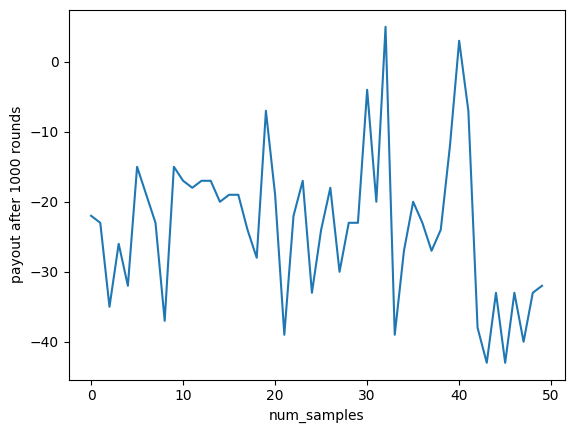

Average payout after 100 rounds is -23.42


In [4]:
from blackjackenv import BlackjackEnv
env = BlackjackEnv()
env.reset()
# env = wrappers.Monitor(env, './logs/blackjack-Q', False, True)
import matplotlib.pyplot as plt
from collections import deque
import time

start_time = time.time()

# print(agent.model)

num_rounds = 100 # Payout calculated over num_rounds
num_samples = 50 # num_rounds simulated over num_samples

agent = DQNAgent(env=env, epsilon=0.1, alpha=0.001, gamma=0.001, time=7500, noise_scale=0.1)

average_payouts = []

state,_ = env.reset()
state = np.reshape(state[0:2], [1,2])
for sample in range(num_samples):
    round = 1
    total_payout = 0 # store total payout per sample
    while round <= num_rounds:
        action = agent.choose_action(state)
        next_state, payout, done, _, _ = env.step(action)
        next_state = np.reshape(next_state[0:2], [1,2])

        
        total_payout += payout    
#         if agent.learning:
        agent.learn(state, action, payout, next_state, done)
        
        state = next_state
        state = np.reshape(state[0:2], [1,2])
        
        if done:
            state,_ = env.reset() # Environment deals new cards to player and dealer
            state = np.reshape(state[0:2], [1,2])
            round += 1

    average_payouts.append(total_payout)

    if sample % 10 == 0:
        print('Done with sample: ' + str(sample) + str("   --- %s seconds ---" % (time.time() - start_time)))
        print(agent.epsilon)

print(agent.get_optimal_strategy())

# Plot payout per 1000 episodes for each value of 'sample'

plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))


HELLO
1/1 [==============================] - 0s 17ms/step


C:\Users\87235\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 0   --- 18.17449688911438 seconds ---
0.09763555555555484
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 10   --- 191.93338322639465 seconds ---
0.07402666666665872
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 20   --- 368.31829714775085 seconds ---
0.04997333333332291
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 30   --- 547.0907139778137 seconds ---
0.026044444444436037
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
Done with sample: 40   --- 718.275586605072 seconds ---
0.002791111111103434
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step
           Stand       Hit Optimal
(0, 1)       NaN       NaN   Stand
(0, 2)       NaN       NaN   Stand
(0, 3)       NaN       NaN   Stand
(0, 4)       NaN       NaN   Stand
(0, 5)       NaN       NaN   Stand
...          ...       ...     ...
16      0.500242  0.499758   Stand
17      0.499524  0.500476     Hit
18      0.498806  0.501194     Hit
19      0.498088  0.501912     Hit
20      0.499481  0.500519     Hit

[231 rows x 3 columns]


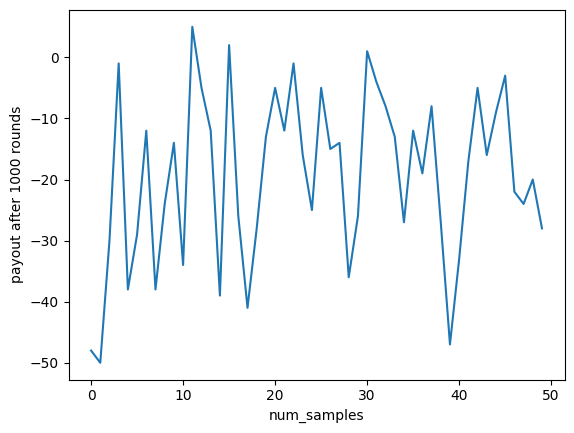

Average payout after 100 rounds is -19.42


In [5]:
from blackjackenv import BlackjackEnv
env = BlackjackEnv()
env.reset()
# env = wrappers.Monitor(env, './logs/blackjack-Q', False, True)
import matplotlib.pyplot as plt
from collections import deque
import time

start_time = time.time()

# print(agent.model)

num_rounds = 100 # Payout calculated over num_rounds
num_samples = 50 # num_rounds simulated over num_samples

agent = DQNAgent(env=env, epsilon=0.1, alpha=0.001, gamma=0.005, time=7500, noise_scale=0.1)

average_payouts = []

state,_ = env.reset()
state = np.reshape(state[0:2], [1,2])
for sample in range(num_samples):
    round = 1
    total_payout = 0 # store total payout per sample
    while round <= num_rounds:
        action = agent.choose_action(state)
        next_state, payout, done, _, _ = env.step(action)
        next_state = np.reshape(next_state[0:2], [1,2])

        
        total_payout += payout    
#         if agent.learning:
        agent.learn(state, action, payout, next_state, done)
        
        state = next_state
        state = np.reshape(state[0:2], [1,2])
        
        if done:
            state,_ = env.reset() # Environment deals new cards to player and dealer
            state = np.reshape(state[0:2], [1,2])
            round += 1

    average_payouts.append(total_payout)

    if sample % 10 == 0:
        print('Done with sample: ' + str(sample) + str("   --- %s seconds ---" % (time.time() - start_time)))
        print(agent.epsilon)

print(agent.get_optimal_strategy())

# Plot payout per 1000 episodes for each value of 'sample'

plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))


In [39]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.layers import GaussianNoise
import pandas as pd

random.seed(0)

class DQNAgent():
    def __init__(self, env, epsilon=1.0, alpha=0.5, gamma=0.9, time = 30000):
        self.env = env
        self.action_size = self.env.action_space.n
        self.state_size = env.observation_space
        self.memory = deque(maxlen=2000) # Record past experiences- [(state, action, reward, next_state, done)...]
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor
        self.gamma = gamma       # Discount factor- closer to 1 learns well into distant future
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning = True
        self.model = self._build_model()
        self.thompson_alpha = np.ones(self.env.action_space.n)
        self.thompson_beta = np.ones(self.env.action_space.n)
        
        self.time = time 
        self.time_left = time # Epsilon Decay
        self.small_decrement = (0.4 * epsilon) / (0.3 * self.time_left) # reduce epsilon
        print('HELLO')
    
    # Build Neural Net
    def _build_model(self):
#         print(type(self.state_size))
        model = Sequential()
        model.add(Dense(32, input_shape = (2,), kernel_initializer='random_uniform', activation='relu'))
        model.add(GaussianNoise(0.1))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(self.action_size, activation='softmax'))
        model.compile(loss='binary_crossentropy', optimizer=Adam(lr=self.alpha))
        
        return model
       
#     # Remember function that stores states, actions, rewards, and done to memory
#     def remember(self, state, action, reward, next_state, done):
#         self.memory.append([state, action, reward, next_state, done])

    def choose_action(self, state):
        """
        Choose which action to take, based on the observation. 
        Uses greedy epsilon for exploration/exploitation.
        """

        # if random number > epsilon, act 'rationally'. otherwise, choose random action
        
        if np.random.rand() <= self.epsilon:
            action = random.randrange(self.action_size)
            
        else:
            action_value = self.model.predict(state)
            action = np.argmax(action_value[0])
        
        self.update_parameters()
        return action
    
    def boltzmann_action(self, state):
        
        current_action_values =self.model.predict(state)[0]
    
        exp_probabilities = np.exp(current_action_values / 0.1 )
#         print( 'exp', exp_probabilities)
        probabilities = exp_probabilities / np.sum(exp_probabilities)
#         print( 'normoalization' , probabilities)
#         if 1- np.sum(np.sum(probabilities[:-1])) < 1e-10 :
#             probabilities[-1] = 1e-10
            
        
        # choose actions according to the probabilities
        action = np.random.choice(range(self.action_size), p=probabilities)
        self.update_parameters()
        return action 
        
        
    def update_parameters(self):
        """
        Update epsilon and alpha after each action
        Set them to 0 if not learning
        """
#         print(self.time_left)
        if self.time_left > 0.9 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.7 * self.time:
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.5 * self.time:
            self.epsilon -= self.small_decrement
#             print('0.5')
        elif self.time_left > 0.3 * self.time:
#             print('0.2')
            self.epsilon -= self.small_decrement
        elif self.time_left > 0.1 * self.time:
            self.epsilon -= self.small_decrement
#         elif self.time_left < 0.05 * self.time:
#             self.epsilon = 0.000
#             self.learning = False

#         print(self.time_left)
        #         print(self.time)
        self.time_left -= 1       


    def learn(self, state, action, reward, next_state, done):
        
        
        
#         minibatch = random.sample(self.memory, batch_size)
#         print(minibatch)
        
        target = reward
#         print('STATE: ' + str(state))
#             print('next_state: ' + str(state))

#         print('target: ' + str(target))

        if not done:
            target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

#         print('target: ' + str(target))


#         print('action: ' + str(action))
#             print(self.model.predict(next_state))
#         print(np.amax(self.model.predict(next_state)[0]))

        target_f = self.model.predict(state)
#         print(target_f)
#         print('target_f: ' + str(target_f))


        target_f[0][action] = target
#         print('target_f: ' + str(target_f))
#             print('target_f: ' + str(target_f))
#         print('-------')

        self.model.fit(state, target_f, epochs=1, verbose=0)
        
        
#             print(self.time)
#         print(self.epsilon)

    def get_optimal_strategy(self):
        index = []
        for x in range(0,21):
            for y in range(1,11):
                index.append((x,y))

        df = pd.DataFrame(index = index, columns = ['Stand', 'Hit'])

        for ind in range(0,21):
            outcome = self.model.predict([np.array([index[ind]])], batch_size=1)
            df.loc[ind, 'Stand'] = outcome[0][0]
            df.loc[ind, 'Hit'] = outcome[0][1]


        df['Optimal'] = df.apply(lambda x : 'Hit' if x['Hit'] >= x['Stand'] else 'Stand', axis=1)
        df.to_csv('optimal_policy.csv')
        return df

In [ ]:
from blackjackenv import BlackjackEnv
env = BlackjackEnv()
env.reset()
# env = wrappers.Monitor(env, './logs/blackjack-Q', False, True)
import matplotlib.pyplot as plt
from collections import deque
import time

start_time = time.time()

# print(agent.model)

num_rounds = 100 # Payout calculated over num_rounds
num_samples = 50 # num_rounds simulated over num_samples

agent = DQNAgent(env=env, epsilon=0.1, alpha=0.001, gamma=0.005, time=7500)

average_payouts = []

state,_ = env.reset()
state = np.reshape(state[0:2], [1,2])
for sample in range(num_samples):
    round = 1
    total_payout = 0 # store total payout per sample
    while round <= num_rounds:
        action = agent.boltzmann_action(state)
        next_state, payout, done, _, _ = env.step(action)
        next_state = np.reshape(next_state[0:2], [1,2])

        
        total_payout += payout    
#         if agent.learning:
        agent.learn(state, action, payout, next_state, done)
        
        state = next_state
        state = np.reshape(state[0:2], [1,2])
        
        if done:
            state,_ = env.reset() # Environment deals new cards to player and dealer
            state = np.reshape(state[0:2], [1,2])
            round += 1

    average_payouts.append(total_payout)

    if sample % 10 == 0:
        print('Done with sample: ' + str(sample) + str("   --- %s seconds ---" % (time.time() - start_time)))
        print(agent.epsilon)

print(agent.get_optimal_strategy())

# Plot payout per 1000 episodes for each value of 'sample'

plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))


HELLO
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 0   --- 16.16100287437439 seconds ---
0.09793777777777715
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 10   --- 190.57312178611755 seconds ---
0.07493333333332566
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


HELLO
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
Done with sample: 0   --- 14.470999002456665 seconds ---
0.09806222222222163
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 10   --- 180.2749981880188 seconds ---
0.07580444444443704
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 20   --- 360.200715303421 seconds ---
0.052213333333322724


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step
Done with sample: 30   --- 538.0804333686829 seconds ---
0.028906666666658018
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
Done with sample: 40   --- 709.9776730537415 seconds ---
0.006133333333325674
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step
           Stand       Hit Optimal
(0, 1)       NaN       NaN   Stand
(0, 2)       NaN       NaN   Stand
(0, 3)       NaN       NaN   Stand
(0, 4)       NaN       NaN   Stand
(0, 5)       NaN       NaN   Stand
...          ...       ...     ...
16      0.389209  0.610791     Hit
17      0.388532  0.611468     Hit
18      0.387857  0.612143     Hit
19      0.387181  0.612819     Hit
20      0.428757  0.571243     Hit

[231 rows x 3 columns]


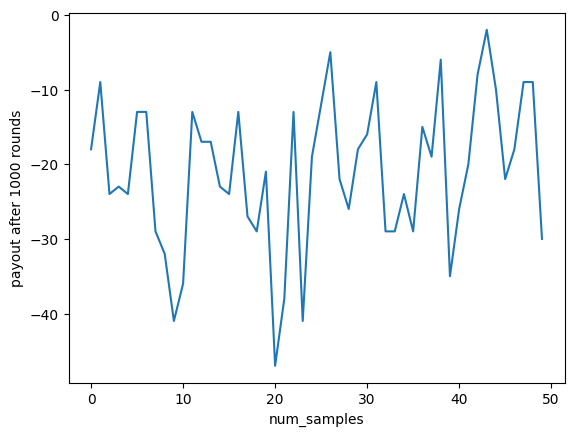

Average payout after 100 rounds is -21.04


In [34]:
from blackjackenv import BlackjackEnv
env = BlackjackEnv()
env.reset()
# env = wrappers.Monitor(env, './logs/blackjack-Q', False, True)
import matplotlib.pyplot as plt
from collections import deque
import time

start_time = time.time()

# print(agent.model)

num_rounds = 100 # Payout calculated over num_rounds
num_samples = 50 # num_rounds simulated over num_samples

agent = DQNAgent(env=env, epsilon=0.1, alpha=0.001, gamma=0.005, time=7500)

average_payouts = []

state,_ = env.reset()
state = np.reshape(state[0:2], [1,2])
for sample in range(num_samples):
    round = 1
    total_payout = 0 # store total payout per sample
    while round <= num_rounds:
        action = agent.boltzmann_action(state)
        next_state, payout, done, _, _ = env.step(action)
        next_state = np.reshape(next_state[0:2], [1,2])

        
        total_payout += payout    
#         if agent.learning:
        agent.learn(state, action, payout, next_state, done)
        
        state = next_state
        state = np.reshape(state[0:2], [1,2])
        
        if done:
            state,_ = env.reset() # Environment deals new cards to player and dealer
            state = np.reshape(state[0:2], [1,2])
            round += 1

    average_payouts.append(total_payout)

    if sample % 10 == 0:
        print('Done with sample: ' + str(sample) + str("   --- %s seconds ---" % (time.time() - start_time)))
        print(agent.epsilon)

print(agent.get_optimal_strategy())

# Plot payout per 1000 episodes for each value of 'sample'

plt.plot(average_payouts)           
plt.xlabel('num_samples')
plt.ylabel('payout after 1000 rounds')
plt.show()
    
print ("Average payout after {} rounds is {}".format(num_rounds, sum(average_payouts)/(num_samples)))
